## Exercise 2.4 Fundamentals of Visualization Libraries Part 2

In [2]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [3]:
df = pd.read_csv('weather_and_daily_bike_rides_data.csv', index_col = 0)

C:\Users\canam\AppData\Local\Temp\ipykernel_19320\1142865059.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weather_and_daily_bike_rides_data.csv', index_col = 0)


In [4]:
df.head()

ride_id rideable_type               started_at  \
date                                                                  
2022-01-01  4358B9E87D6D7A16  classic_bike  2022-01-01 14:54:02.879   
2022-01-01  38B902A7913496FB  classic_bike  2022-01-01 14:16:55.828   
2022-01-01  43DD38318BC7164E  classic_bike  2022-01-01 15:02:57.752   
2022-01-01  A74287183A50FD7B  classic_bike  2022-01-01 06:09:55.182   
2022-01-01  111FDEBA5E422B14  classic_bike  2022-01-01 15:22:00.906   

                           ended_at        start_station_name  \
date                                                            
2022-01-01  2022-01-01 15:03:11.662            35 St & 21 Ave   
2022-01-01  2022-01-01 14:36:57.086        E 32 St & Park Ave   
2022-01-01  2022-01-01 15:05:15.432  Front St & Washington St   
2022-01-01  2022-01-01 06:13:50.673     Bergen Ave & E 152 St   
2022-01-01  2022-01-01 15:27:44.046   Lexington Ave & E 29 St   

           start_station_id               end_station_name end_station_id  \
date                                                                        
2022-01-01          7170.04                 31 St & 21 Ave        7202.07   
2022-01-01          6280.12        Bleecker St & Crosby St        5679.08   
2022-01-01          4936.01  Cadman Plaza E & Red Cross Pl        4821.06   
2022-01-01          7858.02          Willis Ave & E 141 St        7759.08   
2022-01-01          6164.09        Lexington Ave & E 29 St        6164.09   

            start_lat  start_lng    end_lat    end_lng member_casual  avgTemp  \
date                                                                            
2022-01-01  40.776745 -73.906558  40.778130 -73.908420        member     11.6   
2022-01-01  40.745712 -73.981948  40.726156 -73.995102        member     11.6   
2022-01-01  40.702551 -73.989402  40.699918 -73.989718        member     11.6   
2022-01-01  40.817166 -73.914737  40.810930 -73.921606        member     11.6   
2022-01-01  40.743116 -73.982154  40.743116 -73.982154        casual     11.6   

            daily_bike_rides _merge  
date                                 
2022-01-01             20428   both  
2022-01-01             20428   both  
2022-01-01             20428   both  
2022-01-01             20428   both  
2022-01-01             20428   both

## Creating a bar graph of the top 20 start stations

In [6]:
df['value'] = 1

In [7]:
#grouping start stations by value
df_start_station_counts = df.groupby('start_station_name')['value'].count().reset_index()

In [8]:
df_start_station_counts

start_station_name  value
0                 1 Ave & E 110 St   1075
1                  1 Ave & E 16 St   3379
2                  1 Ave & E 18 St   3517
3                  1 Ave & E 30 St   2327
4                  1 Ave & E 39 St   2588
...                            ...    ...
1746       Wyckoff Ave & Gates Ave    862
1747            Wyckoff St & 3 Ave     17
1748        Wyckoff St & Nevins St    589
1749  Wythe Ave & Metropolitan Ave   3296
1750         Yankee Ferry Terminal    643

[1751 rows x 2 columns]

In [9]:
top_20_start_stations = df_start_station_counts.nlargest(20, 'value')

In [10]:
top_20_start_stations

start_station_name  value
1578           W 21 St & 6 Ave   6373
1708     West St & Chambers St   6238
494         Broadway & W 58 St   5715
285            6 Ave & W 33 St   5396
8              1 Ave & E 68 St   5193
484         Broadway & W 25 St   4977
460         Broadway & E 14 St   4937
1502   University Pl & E 14 St   4861
462         Broadway & E 21 St   4804
785            E 33 St & 1 Ave   4641
29            12 Ave & W 40 St   4608
1594           W 31 St & 7 Ave   4567
24            11 Ave & W 41 St   4495
588   Cleveland Pl & Spring St   4489
1709      West St & Liberty St   4460
561     Central Park S & 6 Ave   4423
1101     Lafayette St & E 8 St   4421
286            6 Ave & W 34 St   4402
793         E 40 St & Park Ave   4308
327            8 Ave & W 33 St   4239

In [11]:
#setting theme
sns.set_theme(style = "dark", palette = "BuGn_r")

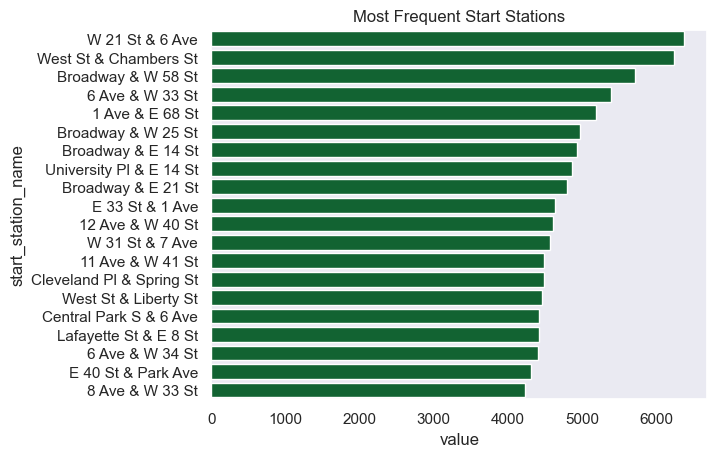

In [12]:
#making a bar plot of the top 20 start stations 
sns.barplot(data = top_20_start_stations, x = 'value', y = 'start_station_name')
plt.title("Most Frequent Start Stations")
plt.show()

C:\Users\canam\AppData\Local\Temp\ipykernel_19320\2701097394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_20_start_stations, x = 'value', y = 'start_station_name', palette=("BuGn_r"))


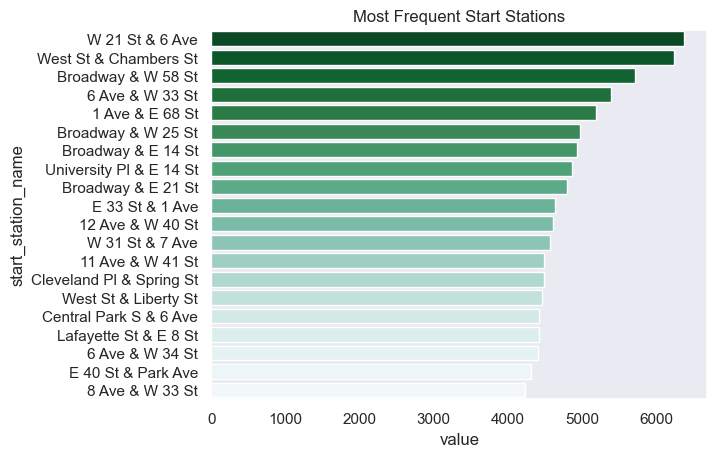

In [13]:
#all bars are the same color in the plot above, so I'm assigning a palette in sns.barplot() 
sns.barplot(data = top_20_start_stations, x = 'value', y = 'start_station_name', palette=("BuGn_r"))
plt.title("Most Frequent Start Stations")
plt.show()

## Recreating dual-axis line plot using seaborn

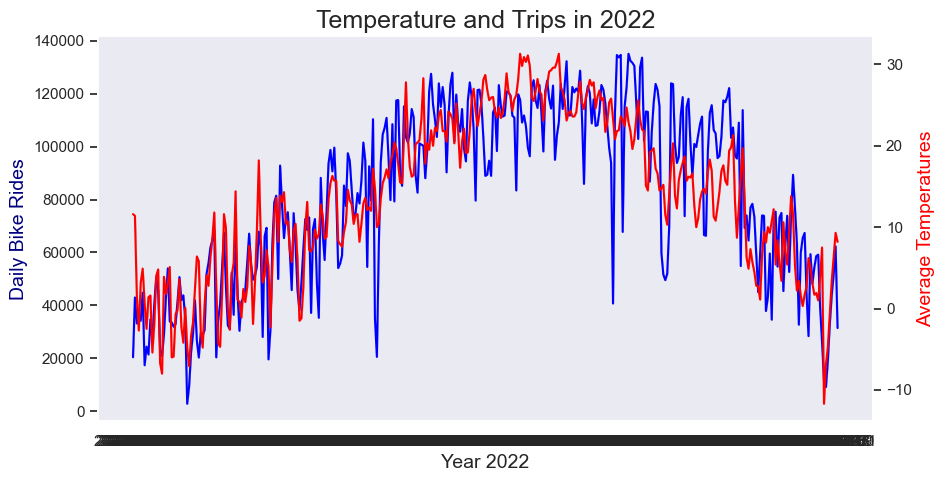

In [15]:
#creating figure and axis objects with subplots 
fig,ax = plt.subplots(figsize=(10, 5))

#creating a plot for daily_bike_rides
sns.lineplot(data = df['daily_bike_rides'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Daily Bike Rides",color = "navy", fontsize = 14) # set y-axis label

#creating the dual axis 
ax2 = ax.twinx()

#creating a plot for avgTemp
sns.lineplot(data = df['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average Temperatures", color = "red",fontsize=14)
plt.title('Temperature and Trips in 2022', fontsize = 18)
plt.show()

## Creating a box plot

C:\Users\canam\AppData\Local\Temp\ipykernel_19320\3638406027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = ('BuGn_r'))


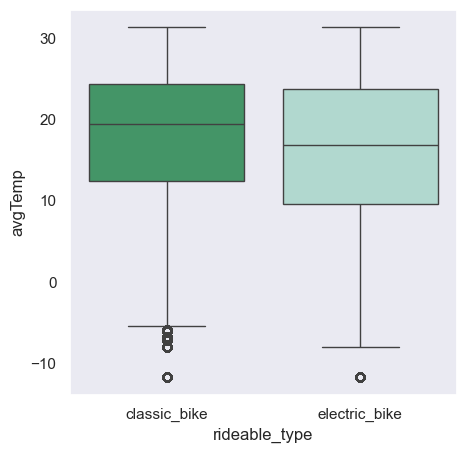

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = ('BuGn_r'))
plt.show()

The median temperature for classic bikes is higher than the temperature for electric bikes.  Classic bikes also have a higher minimum temperature than electric bikes.  The maximum temperature seems to be the same for both types of bikes.  For classic bikes, the median average temperature is closer to Q3, which means the overall temperature distribution is left-skewed.  For electric bikes, the median is the same distance from Q1 and Q3, meaning temperature distribution is fairly even.  There are more outliers for classic bikes than there are for electric bikes.                    

In [19]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'daily_bike_rides', '_merge', 'value'],
      dtype='object')

In [20]:
df.rename(columns = {'member_casual':'user_type'}, inplace = True)

In [21]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'user_type', 'avgTemp', 'daily_bike_rides', '_merge', 'value'],
      dtype='object')

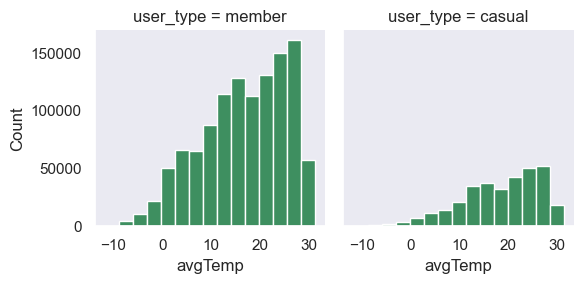

In [22]:
grid = sns.FacetGrid(df, col = "user_type")
grid.map(sns.histplot, "avgTemp", bins = 15)
plt.show()

There are many more member riders than there are casual riders.  Both member riders and casual riders ride more in higher temperatures.  Casual riders very rarely ride in temperatures below 0.  Members ride in temperatures down to -10.  